# HATE DATASET ANALYSIS

## LIBRARIES 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
# DataFrame
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.


In [5]:
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

In [6]:
# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

In [7]:
# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## SETTINGS 

In [8]:
# DATASET
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

## READING DATASET 

In [9]:
import pickle
from sklearn.utils import shuffle

In [10]:
with open('processed_final_ws_hate', 'rb') as fp:
    data = pickle.load(fp)

In [11]:
data = shuffle(data)
data.head()

,tweet,tweet_punct,tweet_pre,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,tweet_clean,class
16840,RT @POONSoaker: Fucking bitches throwing THOTS,RT POONSoaker Fucking bitches throwing THOTS,rt poonsoaker fucking bitches throwing thots,"[rt, poonsoaker, fucking, bitches, throwing, t...","[rt, poonsoaker, fucking, bitches, throwing, t...","[rt, poonsoak, fuck, bitch, throw, thot]","[rt, poonsoaker, fucking, bitch, throwing, thots]","[rt, poonsoak, fuck, bitch, throw, thot]",1
11960,It's no wonder my titanium ankle is killing me...,Its no wonder my titanium ankle is killing me ...,wonder titanium ankle killing woo retarded win...,"[wonder, titanium, ankle, killing, woo, retard...","[wonder, titanium, ankle, killing, woo, retard...","[wonder, titanium, ankl, kill, woo, retard, wi...","[wonder, titanium, ankle, killing, woo, retard...","[wonder, titanium, ankl, kill, woo, retard, wi...",1
105501,"""\n\nSomeone thinks """"football"""" as """"associat...",\n\nSomeone thinks football as association foo...,someone thinks football association football s...,"[someone, thinks, football, association, footb...","[someone, thinks, football, association, footb...","[someon, think, footbal, associ, footbal, some...","[someone, think, football, association, footba...","[someon, think, footbal, associ, footbal, some...",0
112445,Labels \n\nAre the record labels an artist is ...,Labels \n\nAre the record labels an artist is ...,labels record labels artist signed really impo...,"[labels, record, labels, artist, signed, reall...","[labels, record, labels, artist, signed, reall...","[label, record, label, artist, sign, realli, i...","[label, record, label, artist, signed, really,...","[label, record, label, artist, sign, realli, i...",0
116499,"""\nAgain, I have reverted the 'link correction...",\nAgain I have reverted the link correction by...,reverted link correction anonymous user reason...,"[reverted, link, correction, anonymous, user, ...","[reverted, link, correction, anonymous, user, ...","[revert, link, correct, anonym, user, reason, ...","[reverted, link, correction, anonymous, user, ...","[revert, link, correct, anonym, user, reason, ...",0


In [12]:
data.shape

(199004, 9)

In [15]:
data.rename(columns={'class': 'target'}, inplace=True)

In [19]:
data.head()

,tweet,tweet_punct,tweet_pre,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,tweet_clean,target
16840,RT @POONSoaker: Fucking bitches throwing THOTS,RT POONSoaker Fucking bitches throwing THOTS,rt poonsoaker fucking bitches throwing thots,"[rt, poonsoaker, fucking, bitches, throwing, t...","[rt, poonsoaker, fucking, bitches, throwing, t...","[rt, poonsoak, fuck, bitch, throw, thot]","[rt, poonsoaker, fucking, bitch, throwing, thots]","[rt, poonsoak, fuck, bitch, throw, thot]",1
11960,It's no wonder my titanium ankle is killing me...,Its no wonder my titanium ankle is killing me ...,wonder titanium ankle killing woo retarded win...,"[wonder, titanium, ankle, killing, woo, retard...","[wonder, titanium, ankle, killing, woo, retard...","[wonder, titanium, ankl, kill, woo, retard, wi...","[wonder, titanium, ankle, killing, woo, retard...","[wonder, titanium, ankl, kill, woo, retard, wi...",1
105501,"""\n\nSomeone thinks """"football"""" as """"associat...",\n\nSomeone thinks football as association foo...,someone thinks football association football s...,"[someone, thinks, football, association, footb...","[someone, thinks, football, association, footb...","[someon, think, footbal, associ, footbal, some...","[someone, think, football, association, footba...","[someon, think, footbal, associ, footbal, some...",0
112445,Labels \n\nAre the record labels an artist is ...,Labels \n\nAre the record labels an artist is ...,labels record labels artist signed really impo...,"[labels, record, labels, artist, signed, reall...","[labels, record, labels, artist, signed, reall...","[label, record, label, artist, sign, realli, i...","[label, record, label, artist, signed, really,...","[label, record, label, artist, sign, realli, i...",0
116499,"""\nAgain, I have reverted the 'link correction...",\nAgain I have reverted the link correction by...,reverted link correction anonymous user reason...,"[reverted, link, correction, anonymous, user, ...","[reverted, link, correction, anonymous, user, ...","[revert, link, correct, anonym, user, reason, ...","[reverted, link, correction, anonymous, user, ...","[revert, link, correct, anonym, user, reason, ...",0


In [21]:
data_hate = data.loc[data['target'] == 1]
data_hate.head()

,tweet,tweet_punct,tweet_pre,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,tweet_clean,target
16840,RT @POONSoaker: Fucking bitches throwing THOTS,RT POONSoaker Fucking bitches throwing THOTS,rt poonsoaker fucking bitches throwing thots,"[rt, poonsoaker, fucking, bitches, throwing, t...","[rt, poonsoaker, fucking, bitches, throwing, t...","[rt, poonsoak, fuck, bitch, throw, thot]","[rt, poonsoaker, fucking, bitch, throwing, thots]","[rt, poonsoak, fuck, bitch, throw, thot]",1
11960,It's no wonder my titanium ankle is killing me...,Its no wonder my titanium ankle is killing me ...,wonder titanium ankle killing woo retarded win...,"[wonder, titanium, ankle, killing, woo, retard...","[wonder, titanium, ankle, killing, woo, retard...","[wonder, titanium, ankl, kill, woo, retard, wi...","[wonder, titanium, ankle, killing, woo, retard...","[wonder, titanium, ankl, kill, woo, retard, wi...",1
131291,"""\n\n 100 point game \n\nI think you are a mor...",\n\n point game \n\nI think you are a moron b...,point game think moron many times youre first ...,"[point, game, think, moron, many, times, youre...","[point, game, think, moron, many, times, youre...","[point, game, think, moron, mani, time, your, ...","[point, game, think, moron, many, time, youre,...","[point, game, think, moron, mani, time, your, ...",1
6331,@kade_melton he triesto cause drama between pe...,kademelton he triesto cause drama between peop...,kademelton triesto cause drama people said cal...,"[kademelton, triesto, cause, drama, people, sa...","[kademelton, triesto, cause, drama, people, sa...","[kademelton, triesto, caus, drama, peopl, said...","[kademelton, triesto, cause, drama, people, sa...","[kademelton, triesto, caus, drama, peopl, said...",1
10921,I swear females think they know me.... bitch y...,I swear females think they know me bitch you d...,swear females think know bitch dont know inten...,"[swear, females, think, know, bitch, dont, kno...","[swear, females, think, know, bitch, dont, kno...","[swear, femal, think, know, bitch, dont, know,...","[swear, female, think, know, bitch, dont, know...","[swear, femal, think, know, bitch, dont, know,...",1


In [22]:
data_hate.shape

(39090, 9)

In [23]:
data_unhate = data.loc[data['target'] == 0]
data_unhate.head()

,tweet,tweet_punct,tweet_pre,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,tweet_clean,target
105501,"""\n\nSomeone thinks """"football"""" as """"associat...",\n\nSomeone thinks football as association foo...,someone thinks football association football s...,"[someone, thinks, football, association, footb...","[someone, thinks, football, association, footb...","[someon, think, footbal, associ, footbal, some...","[someone, think, football, association, footba...","[someon, think, footbal, associ, footbal, some...",0
112445,Labels \n\nAre the record labels an artist is ...,Labels \n\nAre the record labels an artist is ...,labels record labels artist signed really impo...,"[labels, record, labels, artist, signed, reall...","[labels, record, labels, artist, signed, reall...","[label, record, label, artist, sign, realli, i...","[label, record, label, artist, signed, really,...","[label, record, label, artist, sign, realli, i...",0
116499,"""\nAgain, I have reverted the 'link correction...",\nAgain I have reverted the link correction by...,reverted link correction anonymous user reason...,"[reverted, link, correction, anonymous, user, ...","[reverted, link, correction, anonymous, user, ...","[revert, link, correct, anonym, user, reason, ...","[reverted, link, correction, anonymous, user, ...","[revert, link, correct, anonym, user, reason, ...",0
111350,No problem... but there were actually two othe...,No problem but there were actually two other N...,problem actually two njleg entries outstanding...,"[problem, actually, two, njleg, entries, outst...","[problem, actually, two, njleg, entries, outst...","[problem, actual, two, njleg, entri, outstand,...","[problem, actually, two, njleg, entry, outstan...","[problem, actual, two, njleg, entri, outstand,...",0
94360,"""\n\n Wikilings exposed at http://rexcurry.net...",\n\n Wikilings exposed at httprexcurrynetwikip...,wikilings exposed httprexcurrynetwikipedialies...,"[wikilings, exposed, httprexcurrynetwikipedial...","[wikilings, exposed, httprexcurrynetwikipedial...","[wikil, expos, httprexcurrynetwikipedialieshtm...","[wikilings, exposed, httprexcurrynetwikipedial...","[wikil, expos, httprexcurrynetwikipedialieshtm...",0


In [24]:
data_unhate.shape

(159914, 9)

In [25]:
data_unhate = data_unhate.sample(39090)
data_unhate.head()

,tweet,tweet_punct,tweet_pre,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,tweet_clean,target
65515,Probably not. If you want to include such a th...,Probably not If you want to include such a thi...,probably want include thing make section menti...,"[probably, want, include, thing, make, section...","[probably, want, include, thing, make, section...","[probabl, want, includ, thing, make, section, ...","[probably, want, include, thing, make, section...","[probabl, want, includ, thing, make, section, ...",0
60694,"""\nThanks\nThanks for the message\nIAMR (or wh...",\nThanks\nThanks for the message\nIAMR or what...,thanks thanks message iamr whatever deleted th...,"[thanks, thanks, message, iamr, whatever, dele...","[thanks, thanks, message, iamr, whatever, dele...","[thank, thank, messag, iamr, whatev, delet, th...","[thanks, thanks, message, iamr, whatever, dele...","[thank, thank, messag, iamr, whatev, delet, th...",0
97185,catskill mountains \n\nhave given reason. is u...,catskill mountains \n\nhave given reason is un...,catskill mountains given reason unsourced mate...,"[catskill, mountains, given, reason, unsourced...","[catskill, mountains, given, reason, unsourced...","[catskil, mountain, given, reason, unsourc, ma...","[catskill, mountain, given, reason, unsourced,...","[catskil, mountain, given, reason, unsourc, ma...",0
125373,"Erie, Pennsylvania \nPlease refrain from addin...",Erie Pennsylvania \nPlease refrain from adding...,erie pennsylvania please refrain adding nonsen...,"[erie, pennsylvania, please, refrain, adding, ...","[erie, pennsylvania, please, refrain, adding, ...","[eri, pennsylvania, pleas, refrain, ad, nonsen...","[erie, pennsylvania, please, refrain, adding, ...","[eri, pennsylvania, pleas, refrain, ad, nonsen...",0
36675,The sources tend to indicate that his being Af...,The sources tend to indicate that his being Af...,sources tend indicate africanamerican fact fir...,"[sources, tend, indicate, africanamerican, fac...","[sources, tend, indicate, africanamerican, fac...","[sourc, tend, indic, africanamerican, fact, fi...","[source, tend, indicate, africanamerican, fact...","[sourc, tend, indic, africanamerican, fact, fi...",0


In [26]:
data_unhate.shape

(39090, 9)

In [27]:
dataframe = [data_hate, data_unhate]
data = pd.concat(dataframe)
data = shuffle(data)
data.head()

,tweet,tweet_punct,tweet_pre,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,tweet_clean,target
1906,&#8220;@souljaboy: @kmichelle ur pussy smell l...,souljaboy kmichelle ur pussy smell like dumpst...,souljaboy kmichelle ur pussy smell like dumpst...,"[souljaboy, kmichelle, ur, pussy, smell, like,...","[souljaboy, kmichelle, ur, pussy, smell, like,...","[souljaboy, kmichel, ur, pussi, smell, like, d...","[souljaboy, kmichelle, ur, pussy, smell, like,...","[souljaboy, kmichel, ur, pussi, smell, like, d...",1
158454,"HI\n\nI HATE TURKS A LOT, MAYBE ONE DAY THERE ...",HI\n\nI HATE TURKS A LOT MAYBE ONE DAY THERE W...,hi hate turks lot maybe one day war greece tur...,"[hi, hate, turks, lot, maybe, one, day, war, g...","[hi, hate, turks, lot, maybe, one, day, war, g...","[hi, hate, turk, lot, mayb, one, day, war, gre...","[hi, hate, turk, lot, maybe, one, day, war, gr...","[hi, hate, turk, lot, mayb, one, day, war, gre...",1
1521,Poor editing? The edit looks fine!!! WTF is th...,Poor editing The edit looks fine WTF is the ma...,poor editing edit looks fine wtf matter,"[poor, editing, edit, looks, fine, wtf, matter]","[poor, editing, edit, looks, fine, wtf, matter]","[poor, edit, edit, look, fine, wtf, matter]","[poor, editing, edit, look, fine, wtf, matter]","[poor, edit, edit, look, fine, wtf, matter]",1
116649,"wow, all this crap over some faory stories. wh...",wow all this crap over some faory stories what...,wow crap faory stories bunch douches,"[wow, crap, faory, stories, bunch, douches]","[wow, crap, faory, stories, bunch, douches]","[wow, crap, faori, stori, bunch, douch]","[wow, crap, faory, story, bunch, douche]","[wow, crap, faori, stori, bunch, douch]",1
6960,"@samross58 it's parseltounge, not basilisk you...",samross its parseltounge not basilisk you fuck...,samross parseltounge basilisk fucking pussy ge...,"[samross, parseltounge, basilisk, fucking, pus...","[samross, parseltounge, basilisk, fucking, pus...","[samross, parseltoung, basilisk, fuck, pussi, ...","[samross, parseltounge, basilisk, fucking, pus...","[samross, parseltoung, basilisk, fuck, pussi, ...",1


In [32]:
data = shuffle(data)
data.head()

,tweet,tweet_punct,tweet_pre,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,tweet_clean,target
138037,"Explanation for silence\nTo all my associates,...",Explanation for silence\nTo all my associates ...,explanation silence associates friends enemies...,"[explanation, silence, associates, friends, en...","[explanation, silence, associates, friends, en...","[explan, silenc, associ, friend, enemi, etc, w...","[explanation, silence, associate, friend, enem...","[explan, silenc, associ, friend, enemi, etc, w...",0
39722,Fair game to copy. ) No copyright protection e...,Fair game to copy No copyright protection exi...,fair game copy copyright protection exists del...,"[fair, game, copy, copyright, protection, exis...","[fair, game, copy, copyright, protection, exis...","[fair, game, copi, copyright, protect, exist, ...","[fair, game, copy, copyright, protection, exis...","[fair, game, copi, copyright, protect, exist, ...",0
16537,RT @Mr_JSmart24: So damn sick of that damn lie...,RT MrJSmart So damn sick of that damn lie smfh...,rt mrjsmart damn sick damn lie smfhskinny girl...,"[rt, mrjsmart, damn, sick, damn, lie, smfhskin...","[rt, mrjsmart, damn, sick, damn, lie, smfhskin...","[rt, mrjsmart, damn, sick, damn, lie, smfhskin...","[rt, mrjsmart, damn, sick, damn, lie, smfhskin...","[rt, mrjsmart, damn, sick, damn, lie, smfhskin...",1
5695,@carterboy_leake @italian_montana @tyg235 chil...,carterboyleake italianmontana tyg chill your d...,carterboyleake italianmontana tyg chill dad ge...,"[carterboyleake, italianmontana, tyg, chill, d...","[carterboyleake, italianmontana, tyg, chill, d...","[carterboyleak, italianmontana, tyg, chill, da...","[carterboyleake, italianmontana, tyg, chill, d...","[carterboyleak, italianmontana, tyg, chill, da...",1
110655,I don't know the extent of the EU. Is all of t...,I dont know the extent of the EU Is all of the...,dont know extent eu french republic part eu cf...,"[dont, know, extent, eu, french, republic, par...","[dont, know, extent, eu, french, republic, par...","[dont, know, extent, eu, french, republ, part,...","[dont, know, extent, eu, french, republic, par...","[dont, know, extent, eu, french, republ, part,...",0


In [33]:
data.shape

(78180, 9)

In [34]:
39090*2

78180

In [35]:
with open('equal_processed_final_ws', 'wb') as fp:
    pickle.dump(data, fp)

In [36]:
data.shape

(78180, 9)

In [37]:
decode_map = {0: "UNHATE", 1: "HATE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [38]:
%%time
data.target = data.target.apply(lambda x: decode_sentiment(x))

CPU times: user 1.23 s, sys: 2.91 ms, total: 1.23 s
Wall time: 1.23 s


In [39]:
data.head()

,tweet,tweet_punct,tweet_pre,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,tweet_clean,target
138037,"Explanation for silence\nTo all my associates,...",Explanation for silence\nTo all my associates ...,explanation silence associates friends enemies...,"[explanation, silence, associates, friends, en...","[explanation, silence, associates, friends, en...","[explan, silenc, associ, friend, enemi, etc, w...","[explanation, silence, associate, friend, enem...","[explan, silenc, associ, friend, enemi, etc, w...",UNHATE
39722,Fair game to copy. ) No copyright protection e...,Fair game to copy No copyright protection exi...,fair game copy copyright protection exists del...,"[fair, game, copy, copyright, protection, exis...","[fair, game, copy, copyright, protection, exis...","[fair, game, copi, copyright, protect, exist, ...","[fair, game, copy, copyright, protection, exis...","[fair, game, copi, copyright, protect, exist, ...",UNHATE
16537,RT @Mr_JSmart24: So damn sick of that damn lie...,RT MrJSmart So damn sick of that damn lie smfh...,rt mrjsmart damn sick damn lie smfhskinny girl...,"[rt, mrjsmart, damn, sick, damn, lie, smfhskin...","[rt, mrjsmart, damn, sick, damn, lie, smfhskin...","[rt, mrjsmart, damn, sick, damn, lie, smfhskin...","[rt, mrjsmart, damn, sick, damn, lie, smfhskin...","[rt, mrjsmart, damn, sick, damn, lie, smfhskin...",HATE
5695,@carterboy_leake @italian_montana @tyg235 chil...,carterboyleake italianmontana tyg chill your d...,carterboyleake italianmontana tyg chill dad ge...,"[carterboyleake, italianmontana, tyg, chill, d...","[carterboyleake, italianmontana, tyg, chill, d...","[carterboyleak, italianmontana, tyg, chill, da...","[carterboyleake, italianmontana, tyg, chill, d...","[carterboyleak, italianmontana, tyg, chill, da...",HATE
110655,I don't know the extent of the EU. Is all of t...,I dont know the extent of the EU Is all of the...,dont know extent eu french republic part eu cf...,"[dont, know, extent, eu, french, republic, par...","[dont, know, extent, eu, french, republic, par...","[dont, know, extent, eu, french, republ, part,...","[dont, know, extent, eu, french, republic, par...","[dont, know, extent, eu, french, republ, part,...",UNHATE


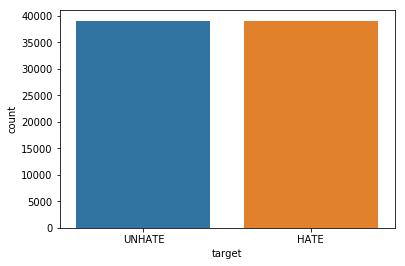

In [40]:
import seaborn as sns
sns.countplot(x = 'target', data = data)

## PREPROCESS DATASET 

In [41]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [42]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [43]:
%%time
data.tweet = data.tweet.apply(lambda x: preprocess(x))

CPU times: user 8.85 s, sys: 13 ms, total: 8.87 s
Wall time: 8.86 s


In [44]:
data.columns

Index(['tweet', 'tweet_punct', 'tweet_pre', 'tweet_tokenized', 'tweet_nonstop',
       'tweet_stemmed', 'tweet_lemmatized', 'tweet_clean', 'target'],
      dtype='object')

## SPLIT TRAIN AND TEST 

In [45]:
df_train, df_test = train_test_split(data, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 62544
TEST size: 15636


## WORD2VEC 

In [46]:
%%time
documents = [_text.split() for _text in df_train.tweet] 

CPU times: user 142 ms, sys: 67.5 ms, total: 210 ms
Wall time: 208 ms


In [47]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [48]:
w2v_model.build_vocab(documents)

2019-03-24 20:57:31,589 : INFO : collecting all words and their counts
2019-03-24 20:57:31,590 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-03-24 20:57:31,650 : INFO : PROGRESS: at sentence #10000, processed 254293 words, keeping 30280 word types
2019-03-24 20:57:31,719 : INFO : PROGRESS: at sentence #20000, processed 509638 words, keeping 45752 word types
2019-03-24 20:57:31,791 : INFO : PROGRESS: at sentence #30000, processed 765178 words, keeping 58045 word types
2019-03-24 20:57:31,862 : INFO : PROGRESS: at sentence #40000, processed 1013730 words, keeping 68836 word types
2019-03-24 20:57:31,936 : INFO : PROGRESS: at sentence #50000, processed 1266480 words, keeping 78294 word types
2019-03-24 20:57:32,014 : INFO : PROGRESS: at sentence #60000, processed 1530517 words, keeping 87465 word types
2019-03-24 20:57:32,035 : INFO : collected 89700 word types from a corpus of 1597007 raw words and 62544 sentences
2019-03-24 20:57:32,036 : INFO : Loading

In [49]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 12570


In [50]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

2019-03-24 20:57:46,983 : INFO : training model with 8 workers on 12570 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7
2019-03-24 20:57:47,997 : INFO : EPOCH 1 - PROGRESS: at 75.90% examples, 1043792 words/s, in_qsize 14, out_qsize 1
2019-03-24 20:57:48,247 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-03-24 20:57:48,248 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-03-24 20:57:48,264 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-03-24 20:57:48,265 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-03-24 20:57:48,276 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-03-24 20:57:48,278 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-03-24 20:57:48,280 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-03-24 20:57:48,282 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-03

2019-03-24 20:57:58,780 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-03-24 20:57:58,802 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-03-24 20:57:58,807 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-03-24 20:57:58,817 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-03-24 20:57:58,822 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-03-24 20:57:58,823 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-03-24 20:57:58,827 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-03-24 20:57:58,828 : INFO : EPOCH - 9 : training on 1597007 raw words (1390128 effective words) took 1.3s, 1060773 effective words/s
2019-03-24 20:57:59,840 : INFO : EPOCH 10 - PROGRESS: at 75.30% examples, 1037174 words/s, in_qsize 16, out_qsize 0
2019-03-24 20:58:00,127 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-03-24 20:58:0

2019-03-24 20:58:09,279 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-03-24 20:58:09,286 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-03-24 20:58:09,289 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-03-24 20:58:09,289 : INFO : EPOCH - 17 : training on 1597007 raw words (1389953 effective words) took 1.3s, 1067374 effective words/s
2019-03-24 20:58:10,301 : INFO : EPOCH 18 - PROGRESS: at 74.65% examples, 1025848 words/s, in_qsize 13, out_qsize 2
2019-03-24 20:58:10,565 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-03-24 20:58:10,572 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-03-24 20:58:10,583 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-03-24 20:58:10,586 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-03-24 20:58:10,588 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-03-24 20:58:

2019-03-24 20:58:20,733 : INFO : EPOCH 26 - PROGRESS: at 77.78% examples, 1068741 words/s, in_qsize 16, out_qsize 0
2019-03-24 20:58:20,967 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-03-24 20:58:20,969 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-03-24 20:58:20,984 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-03-24 20:58:20,986 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-03-24 20:58:20,987 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-03-24 20:58:20,992 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-03-24 20:58:20,996 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-03-24 20:58:20,998 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-03-24 20:58:20,999 : INFO : EPOCH - 26 : training on 1597007 raw words (1390088 effective words) took 1.3s, 1095504 effective words/s
2019-03-24 20:58:

CPU times: user 3min 52s, sys: 1.01 s, total: 3min 53s
Wall time: 41.8 s


(44484153, 51104224)

In [51]:
w2v_model.most_similar("fuck")

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-03-24 20:58:34,504 : INFO : precomputing L2-norms of word weight vectors


[('fucking', 0.4944142699241638),
 ('shit', 0.45532524585723877),
 ('motherfucking', 0.44997256994247437),
 ('gwernol', 0.43931716680526733),
 ('fuckhead', 0.3986322581768036),
 ('snitch', 0.3973414897918701),
 ('motherfucker', 0.39610204100608826),
 ('jujube', 0.3946058452129364),
 ('fuckin', 0.392997682094574),
 ('eppstein', 0.39277517795562744)]

In [52]:
w2v_model.most_similar("bitch")

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('bitches', 0.690582275390625),
 ('hoe', 0.6671152114868164),
 ('niggah', 0.6000617146492004),
 ('nigguh', 0.5988130569458008),
 ('nicca', 0.58819580078125),
 ('hoes', 0.5832676291465759),
 ('ima', 0.5726193785667419),
 ('chick', 0.5721694231033325),
 ('nigga', 0.5589268207550049),
 ('pussy', 0.5450543165206909)]

## TOKENIZE TEXT 

In [53]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.tweet)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 89701
CPU times: user 2.16 s, sys: 28 ms, total: 2.18 s
Wall time: 2.18 s


In [54]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.tweet), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.tweet), maxlen=SEQUENCE_LENGTH)

CPU times: user 2.39 s, sys: 68.2 ms, total: 2.45 s
Wall time: 2.45 s


In [55]:
data.head()

,tweet,tweet_punct,tweet_pre,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,tweet_clean,target
138037,explanation silence associates friends enemies...,Explanation for silence\nTo all my associates ...,explanation silence associates friends enemies...,"[explanation, silence, associates, friends, en...","[explanation, silence, associates, friends, en...","[explan, silenc, associ, friend, enemi, etc, w...","[explanation, silence, associate, friend, enem...","[explan, silenc, associ, friend, enemi, etc, w...",UNHATE
39722,fair game copy copyright protection exists del...,Fair game to copy No copyright protection exi...,fair game copy copyright protection exists del...,"[fair, game, copy, copyright, protection, exis...","[fair, game, copy, copyright, protection, exis...","[fair, game, copi, copyright, protect, exist, ...","[fair, game, copy, copyright, protection, exis...","[fair, game, copi, copyright, protect, exist, ...",UNHATE
16537,rt mr jsmart24 damn sick damn lie smfh 8230 sk...,RT MrJSmart So damn sick of that damn lie smfh...,rt mrjsmart damn sick damn lie smfhskinny girl...,"[rt, mrjsmart, damn, sick, damn, lie, smfhskin...","[rt, mrjsmart, damn, sick, damn, lie, smfhskin...","[rt, mrjsmart, damn, sick, damn, lie, smfhskin...","[rt, mrjsmart, damn, sick, damn, lie, smfhskin...","[rt, mrjsmart, damn, sick, damn, lie, smfhskin...",HATE
5695,italian montana tyg235 chill dad gets bitches ...,carterboyleake italianmontana tyg chill your d...,carterboyleake italianmontana tyg chill dad ge...,"[carterboyleake, italianmontana, tyg, chill, d...","[carterboyleake, italianmontana, tyg, chill, d...","[carterboyleak, italianmontana, tyg, chill, da...","[carterboyleake, italianmontana, tyg, chill, d...","[carterboyleak, italianmontana, tyg, chill, da...",HATE
110655,know extent eu french republic part eu cfp fra...,I dont know the extent of the EU Is all of the...,dont know extent eu french republic part eu cf...,"[dont, know, extent, eu, french, republic, par...","[dont, know, extent, eu, french, republic, par...","[dont, know, extent, eu, french, republ, part,...","[dont, know, extent, eu, french, republic, par...","[dont, know, extent, eu, french, republ, part,...",UNHATE


## LABEL ENCODER 

In [56]:
labels = df_train.target.unique().tolist()
labels

['HATE', 'UNHATE']

In [57]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

LabelEncoder()

In [58]:
y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

In [62]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [63]:
print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (62544, 1)
y_test (15636, 1)


In [64]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (62544, 300)
y_train (62544, 1)

x_test (15636, 300)
y_test (15636, 1)


In [65]:
y_train[:10]

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1]])

## EMBEDDING LAYER 

In [66]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(89701, 300)


In [67]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

## BUILD MODEL 

In [68]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


2019-03-24 21:03:34,883 : WARNING : From /home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2019-03-24 21:03:37,075 : WARNING : From /home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          26910300  
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 27,070,801
Trainable params: 160,501
Non-trainable params: 26,910,300
_________________________________________________________________


## COMPILE MODEL 

In [69]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

## CALLBACKS 

In [70]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

## TRAIN 

In [71]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.


2019-03-24 21:05:10,244 : WARNING : From /home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 56289 samples, validate on 6255 samples
Epoch 1/8
56289/56289 [==============================] - 265s 5ms/step - loss: 0.3623 - acc: 0.8403 - val_loss: 0.2525 - val_acc: 0.8978
Epoch 2/8
56289/56289 [==============================] - 262s 5ms/step - loss: 0.2657 - acc: 0.8905 - val_loss: 0.2243 - val_acc: 0.9130
Epoch 3/8
56289/56289 [==============================] - 262s 5ms/step - loss: 0.2458 - acc: 0.8981 - val_loss: 0.1978 - val_acc: 0.9186
Epoch 4/8
56289/56289 [==============================] - 260s 5ms/step - loss: 0.2303 - acc: 0.9038 - val_loss: 0.1933 - val_acc: 0.9197
Epoch 5/8
56289/56289 [==============================] - 262s 5ms/step - loss: 0.2184 - acc: 0.9098 - val_loss: 0.1860 - val_acc: 0.9228
Epoch 6/8
56289/56289 [==============================] - 254s 5ms/step - loss: 0.2114 - acc: 0.9118 - val_loss: 0.1819 - val_acc: 0.9221
Epoch 7/8
56289/56289 [==============================] - 258s 5ms/step - loss: 0.2062 - acc: 0.9133 - val_loss: 0.1844 - val_acc:

## EVALUATE 

In [72]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

15636/15636 [==============================] - 23s 1ms/step

ACCURACY: 0.9217191100974436
LOSS: 0.198402126546283
CPU times: user 2min, sys: 23 s, total: 2min 23s
Wall time: 23.2 s


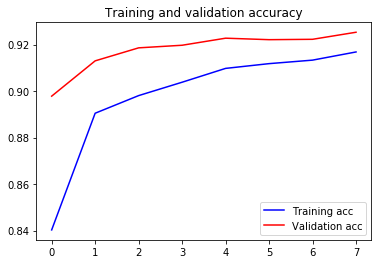

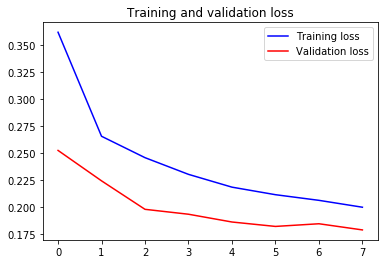

In [73]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

## PREDICT 

In [88]:
def decode_hate(score):
    if score < 0.51:
        return "HATE"
    else:
        return "UNHATE"

In [89]:
def predict(text):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_hate(score)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [90]:
predict("Fuck you asshole")

{'label': 'HATE',
 'score': 0.0009987263474613428,
 'elapsed_time': 0.05876946449279785}

In [91]:
predict("silence is gold")

{'label': 'UNHATE',
 'score': 0.7760472297668457,
 'elapsed_time': 0.0663914680480957}

In [92]:
predict("bitch get the hell out of here")

{'label': 'HATE',
 'score': 0.0007183041889220476,
 'elapsed_time': 0.07068705558776855}

In [93]:
predict("love is beauty")

{'label': 'UNHATE',
 'score': 0.7903070449829102,
 'elapsed_time': 0.07556271553039551}

## CONFUSION MATRIX 

In [94]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_hate(score) for score in scores]

15636/15636 [==============================] - 25s 2ms/step
CPU times: user 2min 7s, sys: 51.5 s, total: 2min 59s
Wall time: 24.8 s


In [95]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

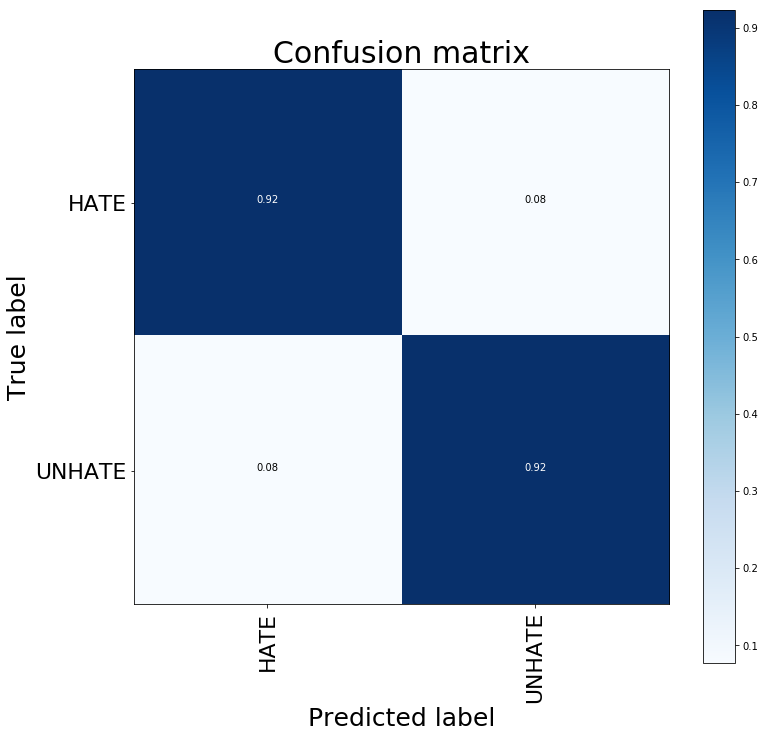

CPU times: user 820 ms, sys: 0 ns, total: 820 ms
Wall time: 336 ms


In [96]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")
plt.show()

## CLASSIFICATION REPORT 

In [97]:
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

        HATE       0.92      0.92      0.92      7921
      UNHATE       0.92      0.92      0.92      7715

   micro avg       0.92      0.92      0.92     15636
   macro avg       0.92      0.92      0.92     15636
weighted avg       0.92      0.92      0.92     15636



## ACCURACY SCORE 

In [98]:
accuracy_score(y_test_1d, y_pred_1d)

0.9213993348682528

## SAVE MODEL 

In [99]:
model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

2019-03-24 21:59:00,820 : INFO : saving Word2Vec object under model.w2v, separately None
2019-03-24 21:59:00,821 : INFO : not storing attribute vectors_norm
2019-03-24 21:59:00,824 : INFO : not storing attribute cum_table
2019-03-24 21:59:01,253 : INFO : saved model.w2v
